# NBA Salary Analysis 2019-2020 Midseason
<br>
Created by:
<br>
John Gomes
<br>
Rayaan Meeran

## Importing and reading csv files
Reading csv files for the NBA player **salaries** and **statistics**

##### Training
- 2016 - 2017
- 2017 - 2018
- 2018 - 2019

##### Testing
- 2019 - 2020 (Midseason Sample)

In [1]:
import pandas as pd 
import numpy as np
import chardet

with open('NBA_2018-19_Player_Salaries.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_salaries_18_19 = pd.read_csv('NBA_2018-19_Player_Salaries.csv', encoding=result['encoding'])

with open('NBA_2018-19_Player_Stats.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_stats_18_19 = pd.read_csv('NBA_2018-19_Player_Stats.csv', encoding=result['encoding'])

with open('NBA_2017-18_Player_Salaries.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_salaries_17_18 = pd.read_csv('NBA_2017-18_Player_Salaries.csv', encoding=result['encoding'])

with open('NBA_2017-18_Player_Stats.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_stats_17_18 = pd.read_csv('NBA_2017-18_Player_Stats.csv', encoding=result['encoding'])

with open('NBA_2016-17_Player_Salaries.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_salaries_16_17 = pd.read_csv('NBA_2016-17_Player_Salaries.csv', encoding=result['encoding'])

with open('NBA_2016-17_Player_Stats.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_stats_16_17 = pd.read_csv('NBA_2016-17_Player_Stats.csv', encoding=result['encoding'])

## Cleaning up the data
- Change player positions in statistics df from **letters** to **numbers**:
	- PG = 1
    - G = 1
	- SG = 2
	- SF = 3
    - F = 3
	- PF = 4
	- C = 5

- Removing repeating players in statistics df who have played on multiple team. In this case take the row with the **total (TOT)** stats for that player.

In [2]:
import unicodedata
def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

# 2018 - 2019
name_array = []
rank = 0
for index, row in player_stats_18_19.iterrows():
    if row['Pos'] == 'G':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'F':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PG':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'SG':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 2
    elif row['Pos'] == 'SF':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PF':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 4
    elif row['Pos'] == 'C':
        player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Pos')] = 5
            
    unaccented = strip_accents(row['Player'])
    unaccented = unaccented.replace('.','')
    player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Player')] = unaccented
    
    if row['Tm'] == 'TOT':
        rank = row['Rk']
    elif rank == row['Rk']:
        name_array.append(index)
    else:
        rank = 0
        
name_array = np.array(name_array)

for i in name_array:
    player_stats_18_19.drop(i, inplace=True)
    
player_stats_18_19.reset_index(drop=True, inplace=True)
player_stats_18_19.fillna(0, inplace=True)


# 2017 - 2018
name_array = []
rank = 0
for index, row in player_stats_17_18.iterrows():
    if row['Pos'] == 'G':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'F':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PG':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'SG':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 2
    elif row['Pos'] == 'SF':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PF':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 4
    elif row['Pos'] == 'C':
        player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Pos')] = 5
            
    unaccented = strip_accents(row['Player'])
    unaccented = unaccented.replace('.','')
    player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Player')] = unaccented
    
    if row['Tm'] == 'TOT':
        rank = row['Rk']
    elif rank == row['Rk']:
        name_array.append(index)
    else:
        rank = 0
        
name_array = np.array(name_array)

for i in name_array:
    player_stats_17_18.drop(i, inplace=True)
    
player_stats_17_18.reset_index(drop=True, inplace=True)
player_stats_17_18.fillna(0, inplace=True)


# 2016 - 2017
name_array = []
rank = 0
for index, row in player_stats_16_17.iterrows():
    if row['Pos'] == 'G':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'F':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PG':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'SG':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 2
    elif row['Pos'] == 'SF':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PF':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 4
    elif row['Pos'] == 'C':
        player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Pos')] = 5
            
    unaccented = strip_accents(row['Player'])
    unaccented = unaccented.replace('.','')
    player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Player')] = unaccented
    
    if row['Tm'] == 'TOT':
        rank = row['Rk']
    elif rank == row['Rk']:
        name_array.append(index)
    else:
        rank = 0
        
name_array = np.array(name_array)

for i in name_array:
    player_stats_16_17.drop(i, inplace=True)
    
player_stats_16_17.reset_index(drop=True, inplace=True)
player_stats_16_17.fillna(0, inplace=True)

player_stats_16_17

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,2,23,OKC,68,6,15.5,2.0,5.0,...,8.3,15.9,1.2,0.9,2.1,0.096,-0.3,-2.2,-2.5,-0.1
1,2,Quincy Acy,4,26,TOT,38,1,14.7,1.8,4.5,...,9.7,16.8,0.5,0.5,0.9,0.082,-1.8,-1.2,-3.0,-0.1
2,3,Steven Adams,5,23,OKC,80,80,29.9,4.7,8.2,...,16.0,16.2,3.3,3.1,6.5,0.130,-0.7,1.2,0.6,1.5
3,4,Arron Afflalo,2,31,SAC,61,45,25.9,3.0,6.9,...,8.4,14.4,1.2,0.2,1.4,0.043,-1.4,-2.1,-3.5,-0.6
4,5,Alexis Ajinca,5,28,NOP,39,15,15.0,2.3,4.6,...,13.7,17.2,0.0,0.9,1.0,0.080,-5.1,1.0,-4.1,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,482,Cody Zeller,5,24,CHO,62,58,27.8,4.1,7.1,...,10.9,15.5,3.4,2.2,5.6,0.157,-0.2,2.3,2.1,1.8
482,483,Tyler Zeller,5,27,BOS,51,5,10.3,1.5,3.1,...,10.2,16.5,0.5,0.6,1.0,0.094,-3.3,0.8,-2.5,-0.1
483,484,Stephen Zimmerman,5,20,ORL,19,0,5.7,0.5,1.6,...,8.3,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1
484,485,Paul Zipser,3,22,CHI,44,18,19.2,2.0,5.0,...,14.4,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4


# Match player salaries to player stats
Add player salaries to dataframes

In [3]:
# 2018 - 2019
player_stats_18_19["Salary"] = np.nan
salary_array = []

for index, row in player_stats_18_19.iterrows():
    player = row['Player']
    player_row = player_salaries_18_19.loc[player_salaries_18_19['Player'] == player]
    isempty = player_row.empty 
    if isempty:
        salary_array.append(index)
        salary = 0
    else:
        salary = player_row.iloc[0][2]
        salary = salary.replace('$','')
        salary = salary.replace(',','')
    player_stats_18_19.iloc[index, player_stats_18_19.columns.get_loc('Salary')] = salary

for i in salary_array:
    player_stats_18_19.drop(i, inplace=True)
player_stats_18_19.reset_index(drop=True, inplace=True)


# 2017 - 2018
player_stats_17_18["Salary"] = np.nan
salary_array = []

for index, row in player_stats_17_18.iterrows():
    player = row['Player']
    player_row = player_salaries_17_18.loc[player_salaries_17_18['Player'] == player]
    isempty = player_row.empty 
    if isempty:
        salary_array.append(index)
        salary = 0
    else:
        salary = player_row.iloc[0][2]
        salary = salary.replace('$','')
        salary = salary.replace(',','')
    player_stats_17_18.iloc[index, player_stats_17_18.columns.get_loc('Salary')] = salary

for i in salary_array:
    player_stats_17_18.drop(i, inplace=True)
player_stats_17_18.reset_index(drop=True, inplace=True)


# 2016 - 2017
player_stats_16_17["Salary"] = np.nan
salary_array = []

for index, row in player_stats_16_17.iterrows():
    player = row['Player']
    player_row = player_salaries_16_17.loc[player_salaries_16_17['Player'] == player]
    isempty = player_row.empty 
    if isempty:
        salary_array.append(index)
        salary = 0
    else:
        salary = player_row.iloc[0][2]
        salary = salary.replace('$','')
        salary = salary.replace(',','')
    player_stats_16_17.iloc[index, player_stats_16_17.columns.get_loc('Salary')] = salary

for i in salary_array:
    player_stats_16_17.drop(i, inplace=True)
player_stats_16_17.reset_index(drop=True, inplace=True)


player_stats_16_17

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
0,1,Alex Abrines,2,23,OKC,68,6,15.5,2.0,5.0,...,15.9,1.2,0.9,2.1,0.096,-0.3,-2.2,-2.5,-0.1,5994764
1,2,Quincy Acy,4,26,TOT,38,1,14.7,1.8,4.5,...,16.8,0.5,0.5,0.9,0.082,-1.8,-1.2,-3.0,-0.1,2965505
2,3,Steven Adams,5,23,OKC,80,80,29.9,4.7,8.2,...,16.2,3.3,3.1,6.5,0.130,-0.7,1.2,0.6,1.5,3140517
3,4,Arron Afflalo,2,31,SAC,61,45,25.9,3.0,6.9,...,14.4,1.2,0.2,1.4,0.043,-1.4,-2.1,-3.5,-0.6,12500000
4,5,Alexis Ajinca,5,28,NOP,39,15,15.0,2.3,4.6,...,17.2,0.0,0.9,1.0,0.080,-5.1,1.0,-4.1,-0.3,4863206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,482,Cody Zeller,5,24,CHO,62,58,27.8,4.1,7.1,...,15.5,3.4,2.2,5.6,0.157,-0.2,2.3,2.1,1.8,5318313
461,483,Tyler Zeller,5,27,BOS,51,5,10.3,1.5,3.1,...,16.5,0.5,0.6,1.0,0.094,-3.3,0.8,-2.5,-0.1,8000000
462,484,Stephen Zimmerman,5,20,ORL,19,0,5.7,0.5,1.6,...,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1,950000
463,485,Paul Zipser,3,22,CHI,44,18,19.2,2.0,5.0,...,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,750000


# Combine dataframes for training
Combining player statistics dataframes into one for training

In [4]:
dataframes = [player_stats_18_19, player_stats_17_18, player_stats_16_17]
player_stats_training = pd.concat(dataframes)
player_stats_training.reset_index(drop=True, inplace=True)

player_stats_training

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
0,1,Alex Abrines,2,25,OKC,31,2,19.0,1.8,5.1,...,12.2,0.1,0.6,0.6,0.053,-2.4,-0.9,-3.4,-0.2,3667645
1,2,Quincy Acy,4,28,PHO,10,0,12.3,0.4,1.8,...,9.2,-0.1,0.0,-0.1,-0.022,-5.7,-0.3,-5.9,-0.1,213948
2,3,Jaylen Adams,1,22,ATL,34,1,12.6,1.1,3.2,...,13.5,-0.1,0.2,0.1,0.011,-3.1,-1.3,-4.4,-0.3,236854
3,4,Steven Adams,5,25,OKC,80,80,33.4,6.0,10.1,...,16.4,5.1,4.0,9.1,0.163,0.6,2.1,2.7,3.2,24157304
4,5,Bam Adebayo,5,21,MIA,82,28,23.3,3.4,5.9,...,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4,2955840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,482,Cody Zeller,5,24,CHO,62,58,27.8,4.1,7.1,...,15.5,3.4,2.2,5.6,0.157,-0.2,2.3,2.1,1.8,5318313
1489,483,Tyler Zeller,5,27,BOS,51,5,10.3,1.5,3.1,...,16.5,0.5,0.6,1.0,0.094,-3.3,0.8,-2.5,-0.1,8000000
1490,484,Stephen Zimmerman,5,20,ORL,19,0,5.7,0.5,1.6,...,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1,950000
1491,485,Paul Zipser,3,22,CHI,44,18,19.2,2.0,5.0,...,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,750000


# Testing data

In [5]:
with open('NBA_2019-20_Player_Salaries.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_salaries_19_20 = pd.read_csv('NBA_2019-20_Player_Salaries.csv', encoding=result['encoding'])

with open('NBA_2019-20_Player_Stats.csv', 'rb') as f:
    result = chardet.detect(f.read())
player_stats_19_20 = pd.read_csv('NBA_2019-20_Player_Stats.csv', encoding=result['encoding'])

# 2019 - 2020
name_array = []
rank = 0
for index, row in player_stats_19_20.iterrows():
    if row['Pos'] == 'G':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'F':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PG':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 1
    elif row['Pos'] == 'SG':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 2
    elif row['Pos'] == 'SF':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 3
    elif row['Pos'] == 'PF':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 4
    elif row['Pos'] == 'C':
        player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Pos')] = 5
            
    unaccented = strip_accents(row['Player'])
    unaccented = unaccented.replace('.','')
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Player')] = unaccented
    
    if row['Tm'] == 'TOT':
        rank = row['Rk']
    elif rank == row['Rk']:
        name_array.append(index)
    else:
        rank = 0
        
name_array = np.array(name_array)

for i in name_array:
    player_stats_19_20.drop(i, inplace=True)
    
player_stats_19_20.reset_index(drop=True, inplace=True)
player_stats_19_20.fillna(0, inplace=True)


# 2019 - 2020
player_stats_19_20["Salary"] = np.nan
salary_array = []

for index, row in player_stats_19_20.iterrows():
    player = row['Player']
    player_row = player_salaries_19_20.loc[player_salaries_19_20['Player'] == player]
    isempty = player_row.empty 
    if isempty:
        salary_array.append(index)
        salary = 0
    else:
        salary = player_row.iloc[0][2]
        salary = salary.replace('$','')
        salary = salary.replace(',','')
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Salary')] = salary

for i in salary_array:
    player_stats_19_20.drop(i, inplace=True)
player_stats_19_20.reset_index(drop=True, inplace=True)

player_stats_19_20

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
0,1,Steven Adams,5,26,OKC,17,17,26.4,4.5,7.4,...,16.7,1.1,0.6,1.6,0.176,0.8,2.8,3.6,0.6,25842697
1,2,Bam Adebayo,5,22,MIA,21,21,32.6,5.1,9.0,...,18.9,1.1,1.4,2.5,0.179,-0.3,4.8,4.5,1.1,3454080
2,3,LaMarcus Aldridge,5,34,SAS,20,20,32.8,7.7,14.8,...,23.3,1.3,0.4,1.7,0.122,1.0,0.2,1.2,0.5,26000000
3,4,Nickeil Alexander-Walker,2,21,NOP,17,0,14.2,2.3,7.1,...,25.0,-0.4,0.1,-0.3,-0.066,-3.8,-3.0,-6.8,-0.3,2964840
4,5,Grayson Allen,2,24,MEM,11,0,19.0,2.4,6.8,...,18.7,-0.2,0.1,-0.1,-0.021,-3.6,-2.6,-6.3,-0.2,2429400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,457,Thaddeus Young,4,31,CHI,22,0,21.2,3.5,8.6,...,21.1,-0.4,0.6,0.2,0.021,-2.6,0.7,-1.9,0.0,12900000
441,458,Trae Young,1,21,ATL,21,21,34.6,9.5,20.5,...,34.6,1.8,0.1,1.9,0.126,7.5,-3.2,4.3,1.2,6273000
442,459,Cody Zeller,5,27,CHO,20,17,23.7,4.4,8.5,...,20.4,0.7,0.2,0.9,0.094,-0.6,-1.4,-2.0,0.0,14471910
443,460,Ante Zizic,5,23,CLE,6,0,11.7,1.8,3.5,...,14.8,0.1,0.0,0.1,0.092,-3.9,-4.9,-8.8,-0.1,2281800


# Creating training and testing data

In [6]:
train_X = player_stats_training[['MP', 'PTS', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PER', 'TS%', 'USG%', 'BPM', 'VORP']]
train_y = player_stats_training['Salary']

test_X = player_stats_19_20[['MP', 'PTS', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PER', 'TS%', 'USG%', 'BPM', 'VORP']]
test_y = player_stats_19_20['Salary']

# Linear Regression

In [7]:
from sklearn import linear_model

linear_reg = linear_model.LinearRegression()
linear_reg.fit(train_X, train_y)
linear_reg_pred = linear_reg.predict(test_X)

player_stats_19_20["LinReg"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = str(int(float(linear_reg_pred[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('LinReg')] = prednum

sal_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['LinReg']) - int(row['Salary'])
    sal_diff.append([diff, index])
sal_diff.sort()

player_stats_19_20

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary,LinReg
0,1,Steven Adams,5,26,OKC,17,17,26.4,4.5,7.4,...,1.1,0.6,1.6,0.176,0.8,2.8,3.6,0.6,25842697,11586532
1,2,Bam Adebayo,5,22,MIA,21,21,32.6,5.1,9.0,...,1.1,1.4,2.5,0.179,-0.3,4.8,4.5,1.1,3454080,14940531
2,3,LaMarcus Aldridge,5,34,SAS,20,20,32.8,7.7,14.8,...,1.3,0.4,1.7,0.122,1.0,0.2,1.2,0.5,26000000,12958378
3,4,Nickeil Alexander-Walker,2,21,NOP,17,0,14.2,2.3,7.1,...,-0.4,0.1,-0.3,-0.066,-3.8,-3.0,-6.8,-0.3,2964840,3817470
4,5,Grayson Allen,2,24,MEM,11,0,19.0,2.4,6.8,...,-0.2,0.1,-0.1,-0.021,-3.6,-2.6,-6.3,-0.2,2429400,5610276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,457,Thaddeus Young,4,31,CHI,22,0,21.2,3.5,8.6,...,-0.4,0.6,0.2,0.021,-2.6,0.7,-1.9,0.0,12900000,6409860
441,458,Trae Young,1,21,ATL,21,21,34.6,9.5,20.5,...,1.8,0.1,1.9,0.126,7.5,-3.2,4.3,1.2,6273000,21483864
442,459,Cody Zeller,5,27,CHO,20,17,23.7,4.4,8.5,...,0.7,0.2,0.9,0.094,-0.6,-1.4,-2.0,0.0,14471910,8781877
443,460,Ante Zizic,5,23,CLE,6,0,11.7,1.8,3.5,...,0.1,0.0,0.1,0.092,-3.9,-4.9,-8.8,-0.1,2281800,2806389


# SVM

In [8]:
from sklearn import svm

svm = svm.SVC(kernel = 'poly', max_iter=1000, gamma='auto')
svm.fit(train_X, train_y)
svm_pred = svm.predict(test_X)

player_stats_19_20["SVM"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = str(int(float(svm_pred[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('SVM')] = prednum

sal_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['SVM']) - int(row['Salary'])
    sal_diff.append([diff, index])
sal_diff.sort()

player_stats_19_20

C:\Users\johng\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary,LinReg,SVM
0,1,Steven Adams,5,26,OKC,17,17,26.4,4.5,7.4,...,0.6,1.6,0.176,0.8,2.8,3.6,0.6,25842697,11586532,2034120
1,2,Bam Adebayo,5,22,MIA,21,21,32.6,5.1,9.0,...,1.4,2.5,0.179,-0.3,4.8,4.5,1.1,3454080,14940531,21224719
2,3,LaMarcus Aldridge,5,34,SAS,20,20,32.8,7.7,14.8,...,0.4,1.7,0.122,1.0,0.2,1.2,0.5,26000000,12958378,20575005
3,4,Nickeil Alexander-Walker,2,21,NOP,17,0,14.2,2.3,7.1,...,0.1,-0.3,-0.066,-3.8,-3.0,-6.8,-0.3,2964840,3817470,671346
4,5,Grayson Allen,2,24,MEM,11,0,19.0,2.4,6.8,...,0.1,-0.1,-0.021,-3.6,-2.6,-6.3,-0.2,2429400,5610276,14720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,457,Thaddeus Young,4,31,CHI,22,0,21.2,3.5,8.6,...,0.6,0.2,0.021,-2.6,0.7,-1.9,0.0,12900000,6409860,6500000
441,458,Trae Young,1,21,ATL,21,21,34.6,9.5,20.5,...,0.1,1.9,0.126,7.5,-3.2,4.3,1.2,6273000,21483864,6587131
442,459,Cody Zeller,5,27,CHO,20,17,23.7,4.4,8.5,...,0.2,0.9,0.094,-0.6,-1.4,-2.0,0.0,14471910,8781877,1207194
443,460,Ante Zizic,5,23,CLE,6,0,11.7,1.8,3.5,...,0.0,0.1,0.092,-3.9,-4.9,-8.8,-0.1,2281800,2806389,15280000


# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='saga', max_iter=50)
log_reg.fit(train_X, train_y)
log_reg_pred = log_reg.predict(test_X)

player_stats_19_20["LogReg"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = str(int(float(log_reg_pred[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('LogReg')] = prednum

sal_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['LogReg']) - int(row['Salary'])
    sal_diff.append([diff, index])
sal_diff.sort()

player_stats_19_20

C:\Users\johng\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\johng\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary,LinReg,SVM,LogReg
0,1,Steven Adams,5,26,OKC,17,17,26.4,4.5,7.4,...,1.6,0.176,0.8,2.8,3.6,0.6,25842697,11586532,2034120,1471382
1,2,Bam Adebayo,5,22,MIA,21,21,32.6,5.1,9.0,...,2.5,0.179,-0.3,4.8,4.5,1.1,3454080,14940531,21224719,23775506
2,3,LaMarcus Aldridge,5,34,SAS,20,20,32.8,7.7,14.8,...,1.7,0.122,1.0,0.2,1.2,0.5,26000000,12958378,20575005,22116750
3,4,Nickeil Alexander-Walker,2,21,NOP,17,0,14.2,2.3,7.1,...,-0.3,-0.066,-3.8,-3.0,-6.8,-0.3,2964840,3817470,671346,77250
4,5,Grayson Allen,2,24,MEM,11,0,19.0,2.4,6.8,...,-0.1,-0.021,-3.6,-2.6,-6.3,-0.2,2429400,5610276,14720000,77250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,457,Thaddeus Young,4,31,CHI,22,0,21.2,3.5,8.6,...,0.2,0.021,-2.6,0.7,-1.9,0.0,12900000,6409860,6500000,77250
441,458,Trae Young,1,21,ATL,21,21,34.6,9.5,20.5,...,1.9,0.126,7.5,-3.2,4.3,1.2,6273000,21483864,6587131,12000000
442,459,Cody Zeller,5,27,CHO,20,17,23.7,4.4,8.5,...,0.9,0.094,-0.6,-1.4,-2.0,0.0,14471910,8781877,1207194,77250
443,460,Ante Zizic,5,23,CLE,6,0,11.7,1.8,3.5,...,0.1,0.092,-3.9,-4.9,-8.8,-0.1,2281800,2806389,15280000,77250


# Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(train_X, train_y)
nb_pred = nb.predict(test_X)

player_stats_19_20["Bayes"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = str(int(float(nb_pred[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Bayes')] = prednum

sal_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['Bayes']) - int(row['Salary'])
    sal_diff.append([diff, index])
sal_diff.sort()

player_stats_19_20

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,WS/48,OBPM,DBPM,BPM,VORP,Salary,LinReg,SVM,LogReg,Bayes
0,1,Steven Adams,5,26,OKC,17,17,26.4,4.5,7.4,...,0.176,0.8,2.8,3.6,0.6,25842697,11586532,2034120,1471382,2947304
1,2,Bam Adebayo,5,22,MIA,21,21,32.6,5.1,9.0,...,0.179,-0.3,4.8,4.5,1.1,3454080,14940531,21224719,23775506,24157304
2,3,LaMarcus Aldridge,5,34,SAS,20,20,32.8,7.7,14.8,...,0.122,1.0,0.2,1.2,0.5,26000000,12958378,20575005,22116750,23775506
3,4,Nickeil Alexander-Walker,2,21,NOP,17,0,14.2,2.3,7.1,...,-0.066,-3.8,-3.0,-6.8,-0.3,2964840,3817470,671346,77250,1312611
4,5,Grayson Allen,2,24,MEM,11,0,19.0,2.4,6.8,...,-0.021,-3.6,-2.6,-6.3,-0.2,2429400,5610276,14720000,77250,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,457,Thaddeus Young,4,31,CHI,22,0,21.2,3.5,8.6,...,0.021,-2.6,0.7,-1.9,0.0,12900000,6409860,6500000,77250,5000000
441,458,Trae Young,1,21,ATL,21,21,34.6,9.5,20.5,...,0.126,7.5,-3.2,4.3,1.2,6273000,21483864,6587131,12000000,26540100
442,459,Cody Zeller,5,27,CHO,20,17,23.7,4.4,8.5,...,0.094,-0.6,-1.4,-2.0,0.0,14471910,8781877,1207194,77250,13000000
443,460,Ante Zizic,5,23,CLE,6,0,11.7,1.8,3.5,...,0.092,-3.9,-4.9,-8.8,-0.1,2281800,2806389,15280000,77250,950000


# Decision Tree

In [11]:
from sklearn import tree

dt = tree.DecisionTreeRegressor()
dt.fit(train_X, train_y)
dt_pred = dt.predict(test_X)

player_stats_19_20["DecTree"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = str(int(float(dt_pred[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('DecTree')] = prednum

sal_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['DecTree']) - int(row['Salary'])
    sal_diff.append([diff, index])
sal_diff.sort()

player_stats_19_20

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,OBPM,DBPM,BPM,VORP,Salary,LinReg,SVM,LogReg,Bayes,DecTree
0,1,Steven Adams,5,26,OKC,17,17,26.4,4.5,7.4,...,0.8,2.8,3.6,0.6,25842697,11586532,2034120,1471382,2947304,18500000
1,2,Bam Adebayo,5,22,MIA,21,21,32.6,5.1,9.0,...,-0.3,4.8,4.5,1.1,3454080,14940531,21224719,23775506,24157304,24119025
2,3,LaMarcus Aldridge,5,34,SAS,20,20,32.8,7.7,14.8,...,1.0,0.2,1.2,0.5,26000000,12958378,20575005,22116750,23775506,4317720
3,4,Nickeil Alexander-Walker,2,21,NOP,17,0,14.2,2.3,7.1,...,-3.8,-3.0,-6.8,-0.3,2964840,3817470,671346,77250,1312611,2029463
4,5,Grayson Allen,2,24,MEM,11,0,19.0,2.4,6.8,...,-3.6,-2.6,-6.3,-0.2,2429400,5610276,14720000,77250,2500000,14631250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,457,Thaddeus Young,4,31,CHI,22,0,21.2,3.5,8.6,...,-2.6,0.7,-1.9,0.0,12900000,6409860,6500000,77250,5000000,11000000
441,458,Trae Young,1,21,ATL,21,21,34.6,9.5,20.5,...,7.5,-3.2,4.3,1.2,6273000,21483864,6587131,12000000,26540100,16663575
442,459,Cody Zeller,5,27,CHO,20,17,23.7,4.4,8.5,...,-0.6,-1.4,-2.0,0.0,14471910,8781877,1207194,77250,13000000,6500000
443,460,Ante Zizic,5,23,CLE,6,0,11.7,1.8,3.5,...,-3.9,-4.9,-8.8,-0.1,2281800,2806389,15280000,77250,950000,5460000


# Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 24)
rf.fit(train_X, train_y)
rf_pred = rf.predict(test_X)

player_stats_19_20["Forest"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = str(int(float(rf_pred[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Forest')] = prednum

sal_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['Forest']) - int(row['Salary'])
    sal_diff.append([diff, index])
sal_diff.sort()

player_stats_19_20


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DBPM,BPM,VORP,Salary,LinReg,SVM,LogReg,Bayes,DecTree,Forest
0,1,Steven Adams,5,26,OKC,17,17,26.4,4.5,7.4,...,2.8,3.6,0.6,25842697,11586532,2034120,1471382,2947304,18500000,13232809
1,2,Bam Adebayo,5,22,MIA,21,21,32.6,5.1,9.0,...,4.8,4.5,1.1,3454080,14940531,21224719,23775506,24157304,24119025,18950459
2,3,LaMarcus Aldridge,5,34,SAS,20,20,32.8,7.7,14.8,...,0.2,1.2,0.5,26000000,12958378,20575005,22116750,23775506,4317720,14184483
3,4,Nickeil Alexander-Walker,2,21,NOP,17,0,14.2,2.3,7.1,...,-3.0,-6.8,-0.3,2964840,3817470,671346,77250,1312611,2029463,4346550
4,5,Grayson Allen,2,24,MEM,11,0,19.0,2.4,6.8,...,-2.6,-6.3,-0.2,2429400,5610276,14720000,77250,2500000,14631250,8337186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,457,Thaddeus Young,4,31,CHI,22,0,21.2,3.5,8.6,...,0.7,-1.9,0.0,12900000,6409860,6500000,77250,5000000,11000000,4928636
441,458,Trae Young,1,21,ATL,21,21,34.6,9.5,20.5,...,-3.2,4.3,1.2,6273000,21483864,6587131,12000000,26540100,16663575,15644102
442,459,Cody Zeller,5,27,CHO,20,17,23.7,4.4,8.5,...,-1.4,-2.0,0.0,14471910,8781877,1207194,77250,13000000,6500000,5686115
443,460,Ante Zizic,5,23,CLE,6,0,11.7,1.8,3.5,...,-4.9,-8.8,-0.1,2281800,2806389,15280000,77250,950000,5460000,2967759


# Ensemble 

Getting the average of the predictions

In [13]:
player_stats_19_20["Ensemble"] = np.nan

for index, row in player_stats_19_20.iterrows():
    prednum = int(0.85 * float(linear_reg_pred[index])) + int(1.15 * float(svm_pred[index])) + int(0.75 * float(log_reg_pred[index])) + int(1.25 * float(nb_pred[index]))
    prednum = str(int(prednum / 4))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Ensemble')] = prednum
    
val_diff = []
for index, row in player_stats_19_20.iterrows():
    diff = int(row['Ensemble']) - int(row['Salary'])
    val_diff.append(diff)

    
player_stats_19_20["Value Diff"] = np.nan

for index, row in player_stats_19_20.iterrows():
    num = str(int(float(val_diff[index])))
    player_stats_19_20.iloc[index, player_stats_19_20.columns.get_loc('Value Diff')] = num
    
    
player_stats_19_20

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,VORP,Salary,LinReg,SVM,LogReg,Bayes,DecTree,Forest,Ensemble,Value Diff
0,1,Steven Adams,5,26,OKC,17,17,26.4,4.5,7.4,...,0.6,25842697,11586532,2034120,1471382,2947304,18500000,13232809,4243864,-21598833
1,2,Bam Adebayo,5,22,MIA,21,21,32.6,5.1,9.0,...,1.1,3454080,14940531,21224719,23775506,24157304,24119025,18950459,21284034,17829954
2,3,LaMarcus Aldridge,5,34,SAS,20,20,32.8,7.7,14.8,...,0.5,26000000,12958378,20575005,22116750,23775506,4317720,14184483,20245705,-5754295
3,4,Nickeil Alexander-Walker,2,21,NOP,17,0,14.2,2.3,7.1,...,-0.3,2964840,3817470,671346,77250,1312611,2029463,4346550,1428899,-1535941
4,5,Grayson Allen,2,24,MEM,11,0,19.0,2.4,6.8,...,-0.2,2429400,5610276,14720000,77250,2500000,14631250,8337186,6219917,3790517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,457,Thaddeus Young,4,31,CHI,22,0,21.2,3.5,8.6,...,0.0,12900000,6409860,6500000,77250,5000000,11000000,4928636,4807829,-8092171
441,458,Trae Young,1,21,ATL,21,21,34.6,9.5,20.5,...,1.2,6273000,21483864,6587131,12000000,26540100,16663575,15644102,17002902,10729902
442,459,Cody Zeller,5,27,CHO,20,17,23.7,4.4,8.5,...,0.0,14471910,8781877,1207194,77250,13000000,6500000,5686115,6290201,-8181709
443,460,Ante Zizic,5,23,CLE,6,0,11.7,1.8,3.5,...,-0.1,2281800,2806389,15280000,77250,950000,5460000,2967759,5300717,3018917


# Output to CSV

Create a csv file called 'predicted_salaries_19_20.csv' to display the predictions 

In [14]:
output_dataframe = player_stats_19_20[['Player', 'Pos', 'Age', 'Tm', 'Salary', 'Ensemble', 'Value Diff', 'LinReg', 'SVM', 'LogReg', 'Bayes', 'DecTree', 'Forest']]
output_dataframe.to_csv('predicted_salaries_19_20.csv', encoding='utf-8')

output_dataframe

,Player,Pos,Age,Tm,Salary,Ensemble,Value Diff,LinReg,SVM,LogReg,Bayes,DecTree,Forest
0,Steven Adams,5,26,OKC,25842697,4243864,-21598833,11586532,2034120,1471382,2947304,18500000,13232809
1,Bam Adebayo,5,22,MIA,3454080,21284034,17829954,14940531,21224719,23775506,24157304,24119025,18950459
2,LaMarcus Aldridge,5,34,SAS,26000000,20245705,-5754295,12958378,20575005,22116750,23775506,4317720,14184483
3,Nickeil Alexander-Walker,2,21,NOP,2964840,1428899,-1535941,3817470,671346,77250,1312611,2029463,4346550
4,Grayson Allen,2,24,MEM,2429400,6219917,3790517,5610276,14720000,77250,2500000,14631250,8337186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Thaddeus Young,4,31,CHI,12900000,4807829,-8092171,6409860,6500000,77250,5000000,11000000,4928636
441,Trae Young,1,21,ATL,6273000,17002902,10729902,21483864,6587131,12000000,26540100,16663575,15644102
442,Cody Zeller,5,27,CHO,14471910,6290201,-8181709,8781877,1207194,77250,13000000,6500000,5686115
443,Ante Zizic,5,23,CLE,2281800,5300717,3018917,2806389,15280000,77250,950000,5460000,2967759


# Data Analysis

In [15]:
val_diff.sort()
ensemble = player_stats_19_20[['Ensemble']]

ensemble_array = []
for index, row in ensemble.iterrows():
    num = int(row['Ensemble'])
    ensemble_array.append(num)
ensemble_array.sort()

print('Predicted 25 Highest Paid Players')
for i in range(25):
    num = ensemble_array[len(ensemble_array) - i - 1]
    player = player_stats_19_20[player_stats_19_20['Ensemble'] == str(num)]
    player = np.array(player)
    print(str(player[0][1]) + "\tSalary = $" + str(num))
    
print('\n\nPredicted 25 Lowest Paid Players')
for i in range(25):
    num = ensemble_array[i]
    player = player_stats_19_20[player_stats_19_20['Ensemble'] == str(num)]
    player = np.array(player)
    print(str(player[0][1]) + "\tSalary = $" + str(num))
    
print('\n\nPredicted 25 Most Underpaid Players')
for i in range(25):
    num = val_diff[len(val_diff) - i - 1]
    player = player_stats_19_20[player_stats_19_20['Value Diff'] == str(num)]
    player = np.array(player)
    print(str(player[0][1]) + "\tDifference = $" + str(num))

print('\n\nPredicted 25 Most Overpaid Players')
for i in range(25):
    num = val_diff[i]
    player = player_stats_19_20[player_stats_19_20['Value Diff'] == str(num)]
    player = np.array(player)
    print(str(player[0][1]) + "\tDifference = $" + str(num))
    
temp_val_diff = []
for i in range(len(val_diff)):
    if val_diff[i] < 0:
        temp_val_diff.append(val_diff[i] * -1)
    else:
        temp_val_diff.append(val_diff[i])
temp_val_diff.sort()

print('\n\nPredicted 25 Most Accurately Paid Players')
for i in range(25):
    num = temp_val_diff[i]
    try:
        player = player_stats_19_20[player_stats_19_20['Value Diff'] == str(num)]
        player = np.array(player)
        print(str(player[0][1]) + "\tDifference = $" + str(num))
    except:
        num = temp_val_diff[i] * -1
        player = player_stats_19_20[player_stats_19_20['Value Diff'] == str(num)]
        player = np.array(player)
        print(str(player[0][1]) + "\tDifference = $" + str(num))

Predicted 25 Highest Paid Players
James Harden	Salary = $27882409
Luka Doncic	Salary = $26923089
LeBron James	Salary = $26624015
Giannis Antetokounmpo	Salary = $25330620
Anthony Davis	Salary = $23776156
Kawhi Leonard	Salary = $23694148
Malcolm Brogdon	Salary = $23680983
Damian Lillard	Salary = $23005969
Domantas Sabonis	Salary = $22868476
Jimmy Butler	Salary = $22728496
Andre Drummond	Salary = $22574073
Kevin Love	Salary = $22352903
Nikola Jokic	Salary = $21497106
Bradley Beal	Salary = $21409765
Bam Adebayo	Salary = $21284034
Jarrett Allen	Salary = $20655217
Brandon Ingram	Salary = $20618739
DeMar DeRozan	Salary = $20563388
LaMarcus Aldridge	Salary = $20245705
Hassan Whiteside	Salary = $19683321
Karl-Anthony Towns	Salary = $19592721
Clint Capela	Salary = $19239740
Russell Westbrook	Salary = $18903836
Nikola Vucevic	Salary = $18763563
Rudy Gobert	Salary = $18755046


Predicted 25 Lowest Paid Players
Jordan Bone	Salary = $-209016
Justin Patton	Salary = $-145731
Dewan Hernandez	Salary = $

# R2 Scores

In [16]:
print("Linear Regression: " + str(linear_reg.score(test_X, test_y)))
print("SVM: " + str(svm.score(test_X, test_y)))
print("Logistic Regression: " + str(log_reg.score(test_X, test_y)))
print("Naive Bayes: " + str(nb.score(test_X, test_y)))
print("Decision Tree: " + str(dt.score(test_X, test_y)))
print("Random Forest: " + str(rf.score(test_X, test_y)))

Linear Regression: 0.44250591426979247
SVM: 0.006741573033707865
Logistic Regression: 0.0
Naive Bayes: 0.0044943820224719105
Decision Tree: -0.01938796868990922
Random Forest: 0.32308400524366


# Plots

Predicted Salary vs Actual Salary

In [17]:
import matplotlib.pyplot as plt

prediction = player_stats_19_20[['Ensemble']]

ensemble_array = []
for index, row in prediction.iterrows():
    num = int(row['Ensemble'])
    ensemble_array.append(num)
prediction = ensemble_array

salary = player_stats_19_20[['Salary']]

salary_array = []
for index, row in salary.iterrows():
    num = int(row['Salary'])
    salary_array.append(num)
salary = salary_array

plt.scatter(salary, prediction)
plt.title("Predicted Salary vs Actual Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

<Figure size 640x480 with 1 Axes>

Age vs Actual Salary

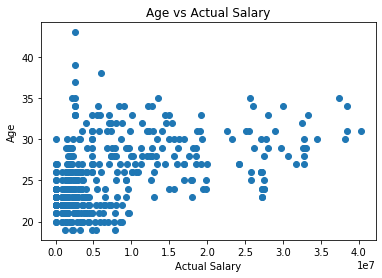

In [18]:
age = player_stats_19_20['Age']

plt.scatter(salary, age)
plt.title("Age vs Actual Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Age")
plt.show()

Age vs Predicted Salary

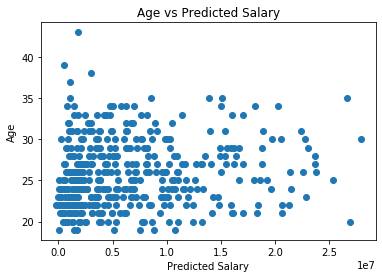

In [19]:
plt.scatter(prediction, age)
plt.title("Age vs Predicted Salary")
plt.xlabel("Predicted Salary")
plt.ylabel("Age")
plt.show()

Value Difference vs Actual Salary

Red line at y = 0


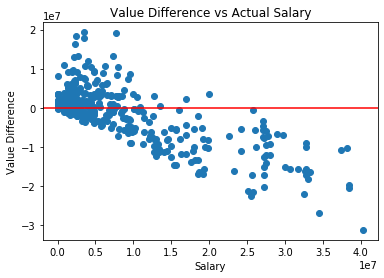

In [20]:
val_diff = player_stats_19_20[['Value Diff']]

val_diff_array = []
for index, row in val_diff.iterrows():
    num = int(row['Value Diff'])
    val_diff_array.append(num)
val_diff = val_diff_array

print('Red line at y = 0')

plt.scatter(salary, val_diff)
plt.title("Value Difference vs Actual Salary")
plt.xlabel("Salary")
plt.ylabel("Value Difference")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Value Difference vs Predicted Salary

Red line at y = 0


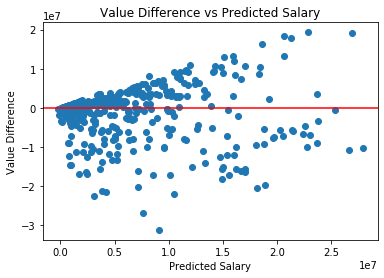

In [21]:
print('Red line at y = 0')

plt.scatter(prediction, val_diff)
plt.title("Value Difference vs Predicted Salary")
plt.xlabel("Predicted Salary")
plt.ylabel("Value Difference")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Predicted Salary vs Player Efficiency Rating

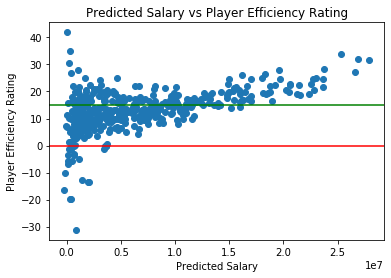

In [22]:
per = player_stats_19_20[['PER']]

plt.scatter(prediction, per)
plt.title("Predicted Salary vs Player Efficiency Rating")
plt.xlabel("Predicted Salary")
plt.ylabel("Player Efficiency Rating")
plt.axhline(y=0, color='r', linestyle='-')
# Standard league average is 15 PER
plt.axhline(y=15, color='g', linestyle='-')
plt.show()

Predicted Salary vs Value Over Replacement Player

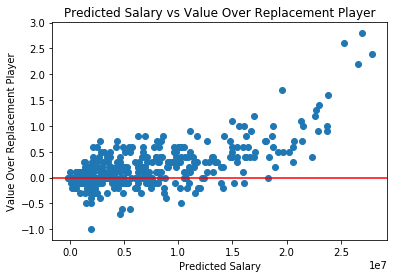

In [23]:
vorp = player_stats_19_20[['VORP']]

plt.scatter(prediction, vorp)
plt.title("Predicted Salary vs Value Over Replacement Player")
plt.xlabel("Predicted Salary")
plt.ylabel("Value Over Replacement Player")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Predicted Salary vs Box Plus/Minus

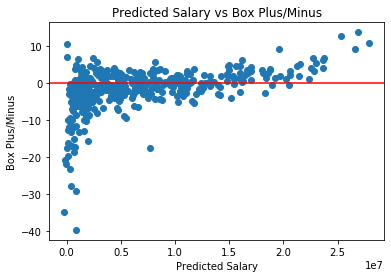

In [24]:
bpm = player_stats_19_20[['BPM']]

plt.scatter(prediction, bpm)
plt.title("Predicted Salary vs Box Plus/Minus")
plt.xlabel("Predicted Salary")
plt.ylabel("Box Plus/Minus")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Predicted Salary vs Usage Percentage

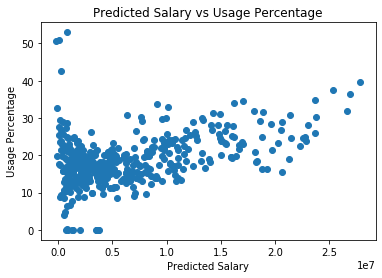

In [25]:
usg = player_stats_19_20[['USG%']]

plt.scatter(prediction, usg)
plt.title("Predicted Salary vs Usage Percentage")
plt.xlabel("Predicted Salary")
plt.ylabel("Usage Percentage")
plt.show()

Age vs Value Difference

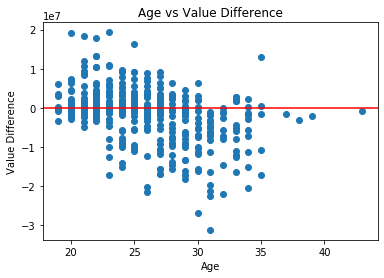

In [26]:
plt.scatter(age, val_diff)
plt.title("Age vs Value Difference")
plt.xlabel("Age")
plt.ylabel("Value Difference")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


# Clustering 

Age vs Predicted Value Difference

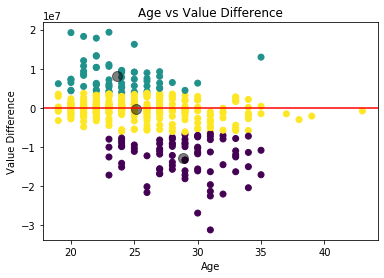

In [27]:
from sklearn.cluster import KMeans

age_val_diff = []
for i in range(len(val_diff)):
    age_val_diff.append([age[i], val_diff[i]])

kmeans = KMeans(n_clusters=3).fit(age_val_diff)
y_kmeans = kmeans.predict(age_val_diff)


plt.scatter(age, val_diff, c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Age vs Value Difference")
plt.xlabel("Age")
plt.ylabel("Value Difference")
plt.show()


Age vs Actual Salary

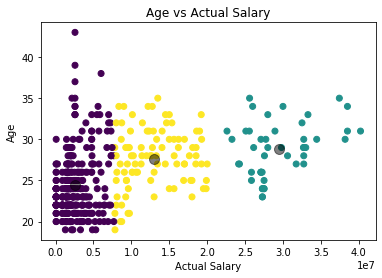

In [28]:
salary_age = []
for i in range(len(salary)):
    salary_age.append([salary[i], age[i]])
    
kmeans = KMeans(n_clusters=3).fit(salary_age)
y_kmeans = kmeans.predict(salary_age)

plt.scatter(salary, age, c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.title("Age vs Actual Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Age")
plt.show()

Age vs Predicted Salary

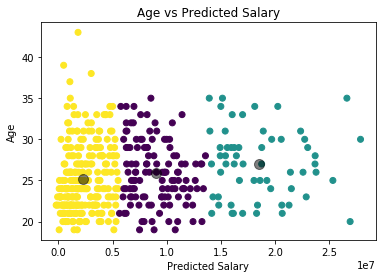

In [29]:
prediction_age = []
for i in range(len(prediction)):
    prediction_age.append([prediction[i], age[i]])
    
kmeans = KMeans(n_clusters=3).fit(prediction_age)
y_kmeans = kmeans.predict(prediction_age)

plt.scatter(prediction, age, c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.title("Age vs Predicted Salary")
plt.xlabel("Predicted Salary")
plt.ylabel("Age")
plt.show()

Actual Salary vs Value Diff

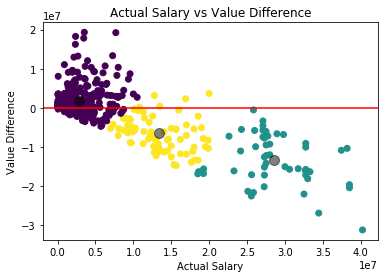

In [30]:
salary_val_diff = []
for i in range(len(salary)):
    salary_val_diff.append([salary[i], val_diff[i]])
    

    
kmeans = KMeans(n_clusters=3).fit(salary_val_diff)
y_kmeans = kmeans.predict(salary_val_diff)

plt.scatter(salary, val_diff, c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Actual Salary vs Value Difference")
plt.xlabel("Actual Salary")
plt.ylabel("Value Difference")
plt.show()

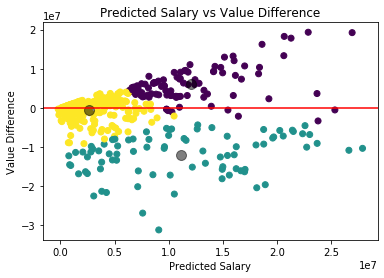

In [31]:
prediction_val_diff = []
for i in range(len(prediction)):
    prediction_val_diff.append([prediction[i], val_diff[i]])
    

    
kmeans = KMeans(n_clusters=3).fit(prediction_val_diff)
y_kmeans = kmeans.predict(prediction_val_diff)

plt.scatter(prediction, val_diff, c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Predicted Salary vs Value Difference")
plt.xlabel("Predicted Salary")
plt.ylabel("Value Difference")
plt.show()